In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('train.csv')

In [2]:
y=df.Survived

In [3]:
X=df.drop(labels=['Name','Ticket','Cabin'],axis=1)

In [4]:
X['Sex'].replace({"male":1,'female':0},inplace=True)
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Embarked'].replace({'S':0,'Q':1,'C':2},inplace=True)
X['Embarked'] = X['Embarked'].fillna(0)

In [5]:
X['FamilySize'] = X['SibSp'] + X['Parch'] + 1
X['IsAlone'] = 0
X.loc[X['FamilySize'] == 1, 'IsAlone'] = 1

X['Fare'] = X['Fare'].fillna(X['Fare'].median())

In [6]:
X.drop(labels=['SibSp'],axis=1)

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,1,22.0,0,7.2500,0.0,2,0
1,2,1,1,0,38.0,0,71.2833,2.0,2,0
2,3,1,3,0,26.0,0,7.9250,0.0,1,1
3,4,1,1,0,35.0,0,53.1000,0.0,2,0
4,5,0,3,1,35.0,0,8.0500,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,13.0000,0.0,1,1
887,888,1,1,0,19.0,0,30.0000,0.0,1,1
888,889,0,3,0,28.0,2,23.4500,0.0,4,0
889,890,1,1,1,26.0,0,30.0000,2.0,1,1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt


In [8]:
X_sp=X.drop(labels='Survived',axis=1)
X_sp

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,3,1,22.0,1,0,7.2500,0.0,2,0
1,2,1,0,38.0,1,0,71.2833,2.0,2,0
2,3,3,0,26.0,0,0,7.9250,0.0,1,1
3,4,1,0,35.0,1,0,53.1000,0.0,2,0
4,5,3,1,35.0,0,0,8.0500,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,0.0,1,1
887,888,1,0,19.0,0,0,30.0000,0.0,1,1
888,889,3,0,28.0,1,2,23.4500,0.0,4,0
889,890,1,1,26.0,0,0,30.0000,2.0,1,1


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_sp, y, train_size=0.7, test_size=0.3,random_state=0)

In [19]:
lm= DecisionTreeClassifier(max_depth=10,min_samples_leaf=5).fit(X_train, y_train)
preds=lm.predict(X_test)


In [11]:
lm.score(X_train,y_train),lm.score(X_test,y_test)


(0.8838951310861424, 0.8095238095238095)

In [12]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(X_train.columns)
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(X):
        f_train = X.loc[train_fold] # Extract train data with cv indices
        f_valid = X.loc[valid_fold] # Extract valid data with cv indices
        

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
#     print("Accuracy per fold: ", fold_accuracy, "\n")
#     print("Average accuracy: ", avg)
#     print("\n")
    
# Just to show results conveniently
a = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
a = a[["Max Depth", "Average Accuracy"]]
print(a.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.786729
         2          0.766654
         3          0.815943
         4          0.795843
         5          0.800262
         6          0.758714
         7          0.789039
         8          0.773333
         9          0.789076
        10          0.775630


In [20]:
lm= DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
preds=lm.predict(X_test)

In [21]:
lm.score(X_train,y_train),lm.score(X_test,y_test)

(0.8362760834670947, 0.8208955223880597)

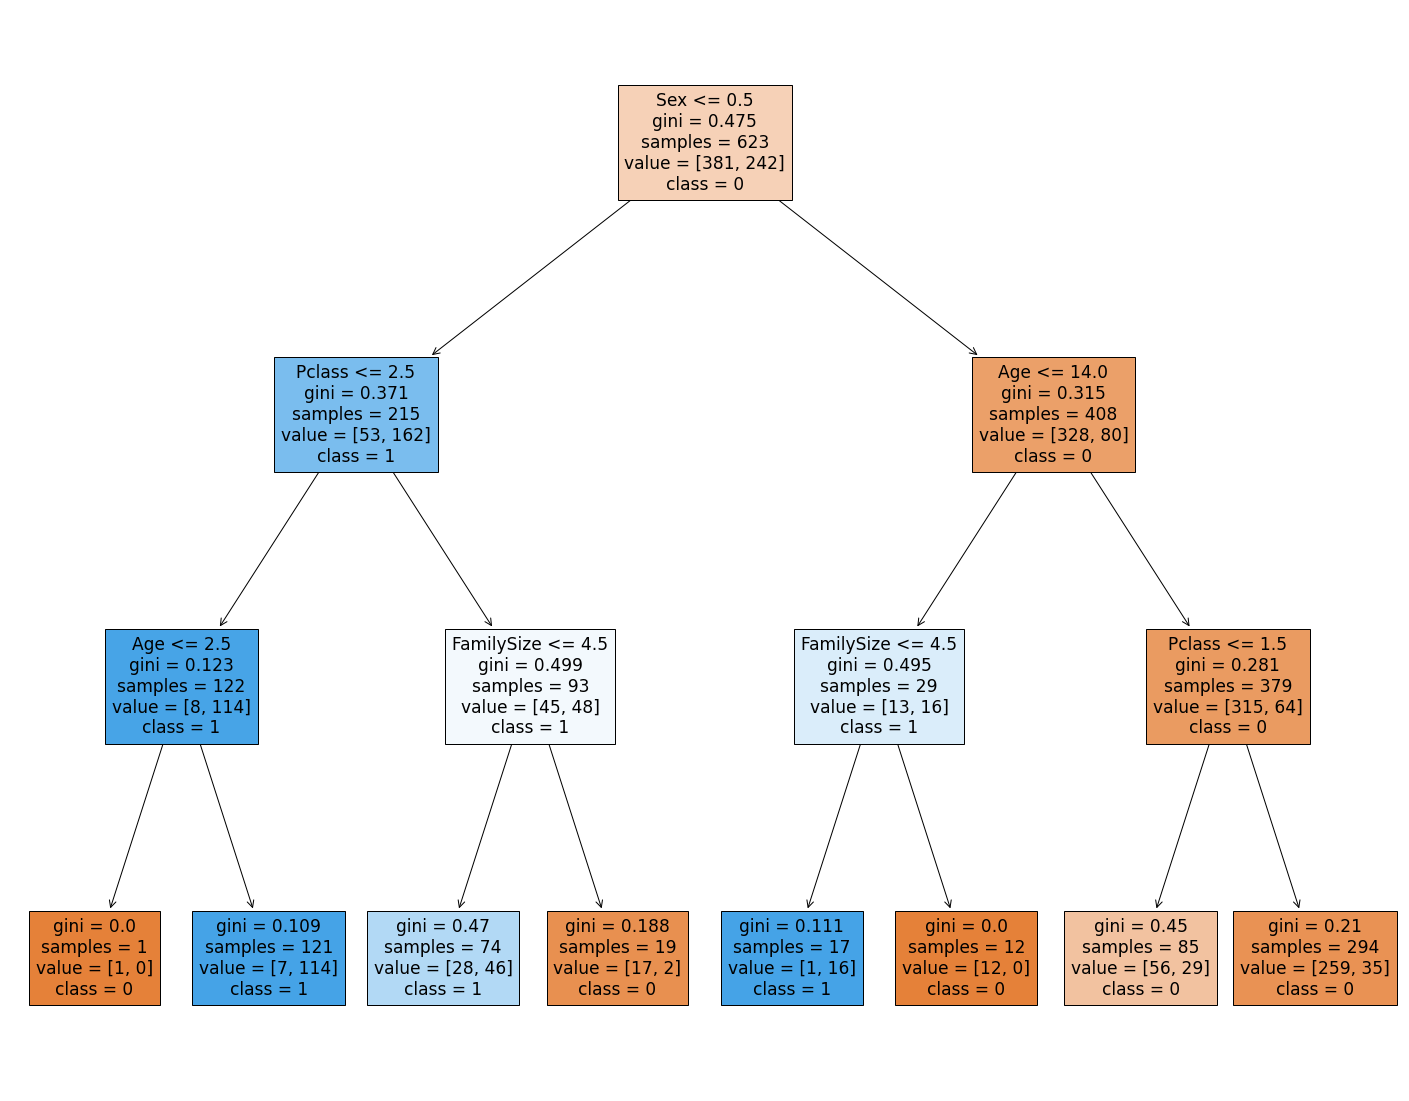

In [22]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(lm, 
                   feature_names=X_sp.columns,  
                   class_names=['0','1'],
                   filled=True)

In [23]:
importance = lm.feature_importances_
col = X_sp.columns
b=zip(col,importance)
list(b)

[('PassengerId', 0.0),
 ('Pclass', 0.17506912414110967),
 ('Sex', 0.6133512022314815),
 ('Age', 0.0677037233020939),
 ('SibSp', 0.0),
 ('Parch', 0.0),
 ('Fare', 0.0),
 ('Embarked', 0.0),
 ('FamilySize', 0.14387595032531494),
 ('IsAlone', 0.0)]

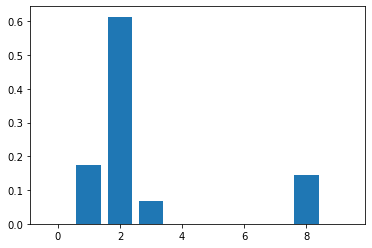

In [24]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()